# Results presentation :

## 1. Import Librarires

In [95]:
import pandas as pd
from sklearn import metrics
from sklearn.utils import resample
from ml_models_results import resmpling_data
from sklearn.utils import resample
from data_processing import train_val_size
from data_processing import prepare_data_brut
from data_processing import prepare_data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from ml_models_results import reglog_model_results
from ml_models_results import results_model_data
from ml_models_results import results_model_dict
from ml_models_results import roc_curve_show
from ml_models_results import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from statistics import mean,stdev,median
from prettytable import PrettyTable

## 2. Logistic Regression

### Preparing data :

We prepare 3 datasets : Train, Validation and Test datasets and we put them into a dictionary.

In [96]:
dict_data = prepare_data(path_to="data/application_train.csv")

Validation data

In [97]:
data_val = dict_data['data_val']
y_val = data_val['TARGET']
data_val_model = data_val.drop(['TARGET'], axis=1)

### Applying model :

First of all, we implement the standart logistic regression model : <strong> unbalanced classes </strong>

In [98]:
model = LogisticRegression()

In [99]:
logreg_results = results_model_dict(model,dict_data)

### Model results :

#### AUC

In [100]:
logreg_results['AUC']

0.6231714116075522

#### Accuracy

In [101]:
logreg_results['Accuracy']

0.9182465610874443

#### Confusion Matrix

*Y distribution :

In [102]:
dist = y_val.value_counts()
dist

0    56474
1     5028
Name: TARGET, dtype: int64

*Confusion Matrix

In [103]:
cm = logreg_results['Confusion_Matrix']
confusion_matrix(cm)

+----------+-------------+-------------+
|          | Predicted 0 | Predicted 1 |
+----------+-------------+-------------+
| Actual 0 |    56474    |      0      |
| Actual 1 |     5028    |      0      |
+----------+-------------+-------------+


The accuracy is very high and the AUC > 0.5 but the model is bad because <strong> the class "1" is unpredicted. </strong>  

In [104]:
"True Postive en % = "+str(round(float(cm[0][0])/float(dist[0])*100,2))+" %"

'True Postive en % = 100.0 %'

In [105]:
"False Positive en % = "+str(round(float(cm[1][1])/float(dist[1])*100,2))+" %"

'False Positive en % = 0.0 %'

#### ROC CURVE

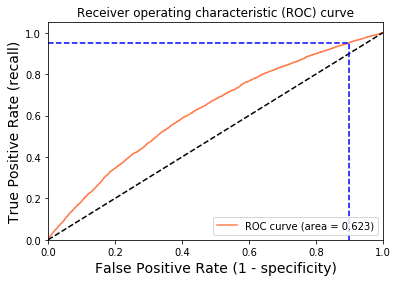

In [106]:
roc_curve_show(model,data_val_model,y_val)

##########################################################################################

In order to improve the model, we try to implement it with <strong> balanced classes </strong>

In [107]:
model_balanced = LogisticRegression(class_weight='balanced')

In [108]:
logreg_results_balanced = results_model_dict(model_balanced,dict_data)

### Model results :

#### AUC

In [109]:
logreg_results_balanced['AUC']

0.6105581911251308

#### Accuracy

In [110]:
logreg_results_balanced['Accuracy']

0.5925335761438653

#### Confusion Matrix

Y distribution :

In [111]:
dist = y_val.value_counts()
dist

0    56474
1     5028
Name: TARGET, dtype: int64

Confusion Matrix

In [112]:
cm_balanced = logreg_results_balanced['Confusion_Matrix']
confusion_matrix(cm_balanced)

+----------+-------------+-------------+
|          | Predicted 0 | Predicted 1 |
+----------+-------------+-------------+
| Actual 0 |    33561    |    22913    |
| Actual 1 |     2147    |     2881    |
+----------+-------------+-------------+


In [113]:
"True Postive en % = "+str(round(float(cm_balanced[0][0])/float(dist[0])*100,2))+" %"

'True Postive en % = 59.43 %'

In [114]:
"False Positive en % = "+str(round(float(cm_balanced[1][1])/float(dist[1])*100,2))+" %"

'False Positive en % = 57.3 %'

The <strong> AUC increased </strong> compared to the first model but the <strong> accuracy highly decreased </strong>. This model can predict the class "1" with a percentage of 63.13 %. We can say that this model is better than the previous one.

#### ROC CURVE

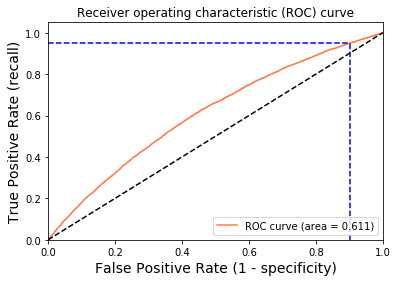

In [115]:
roc_curve_show(model_balanced,data_val_model,y_val)

#########################################################################################

We tried the Logistic Regression Model with <strong> subsampling data </strong>.<br/>
We get a sample from "0" class with the same number of elements for the class "1".

Percentage to sample :

In [116]:
data = dict_data['data_train']
y = data['TARGET']
percentage_to_sample = round(float(y.value_counts()[1])/float(y.value_counts()[0])*100)
"Percentage_to_sample = "+str(percentage_to_sample)+" %"

'Percentage_to_sample = 9.0 %'

In [117]:
data_resampled = resmpling_data(data,9)

In [118]:
model = LogisticRegression()
logreg_results_resampled = results_model_data(model,data_resampled)

### Model results :

#### AUC

In [119]:
logreg_results_resampled['AUC']

0.6025815743183817

#### Accuracy

In [120]:
logreg_results_resampled['Accuracy']

0.5742705570291777

#### Confusion Matrix

Y distribution :

In [121]:
data_val_resampled = logreg_results_resampled['data_val']
y_val_resampled = data_val_resampled['TARGET']
dist = y_val_resampled.value_counts()
dist

0    3032
1    3000
Name: TARGET, dtype: int64

Confusion Matrix

In [122]:
cm_resampled = logreg_results_resampled['Confusion_Matrix']
confusion_matrix(cm_resampled)

+----------+-------------+-------------+
|          | Predicted 0 | Predicted 1 |
+----------+-------------+-------------+
| Actual 0 |     1867    |     1165    |
| Actual 1 |     1403    |     1597    |
+----------+-------------+-------------+


In [123]:
"True Postive en % = "+str(round(float(cm_resampled[0][0])/float(dist[0])*100,2))+" %"

'True Postive en % = 61.58 %'

In [124]:
"False Positive en % = "+str(round(float(cm_resampled[1][1])/float(dist[1])*100,2))+" %"

'False Positive en % = 53.23 %'

#########################################################################################

So, we can conclude that the model with balanced classes is the most appropriate one for the Logistic Regression algorithm.

Then, we check the <strong> standard deviation of 10 models </strong> implemented with Logistic Regression.

### Import dataset

In [125]:
data = prepare_data_brut(path_to="data/application_train.csv")

### List of auc result models

In [126]:
auc_results = list()
accuracy_results = list()

In [127]:
for i in range(0,10):
    auc = results_model_data(model_balanced,data)['AUC']
    accuracy = results_model_data(model_balanced,data)['Accuracy'] 
    auc_results.append(auc)
    accuracy_results.append(accuracy)


### Table of results

In [128]:
t = PrettyTable(['Model', 'accuracy','AUC'])

In [129]:
for i in range(0,10):
    m = "model"+" "+str(i+1)
    t.add_row([m,round(accuracy_results[i],5),round(auc_results[i],5)])

t.add_row(["Mean",mean(accuracy_results),mean(auc_results)])
t.add_row(["Standard deviation",stdev(accuracy_results),stdev(auc_results)])
t.add_row(["Median",median(accuracy_results),median(auc_results)])
print(t)

+--------------------+--------------------+--------------------+
|       Model        |      accuracy      |        AUC         |
+--------------------+--------------------+--------------------+
|      model 1       |      0.61679       |      0.68457       |
|      model 2       |       0.5954       |      0.62904       |
|      model 3       |      0.59209       |      0.62468       |
|      model 4       |      0.62201       |      0.68945       |
|      model 5       |      0.59183       |      0.64507       |
|      model 6       |      0.62972       |      0.66697       |
|      model 7       |      0.60138       |      0.61748       |
|      model 8       |      0.63398       |      0.66117       |
|      model 9       |      0.62109       |      0.67213       |
|      model 10      |      0.62665       |       0.6593       |
|        Mean        | 0.613093883125752  | 0.6549864743113706 |
| Standard deviation |  0.0163189910346   |  0.0250636115853   |
|       Median       | 0.

#################################################################################

## 3. Gradient Boosting Machine

### Prepare Data

In [130]:
dict_data = prepare_data(path_to="data/application_train.csv")

Validation data

In [139]:
data_val = dict_data['data_val']
y_val = data_val['TARGET']
data_val_model = data_val.drop(['TARGET'], axis=1)

### Apply Model

In [131]:
model = GradientBoostingClassifier()

In [132]:
gbm_results = results_model_dict(model,dict_data)

### Model results :

#### AUC

In [133]:
gbm_results['AUC']

0.7149502410593829

#### Accuracy

In [134]:
gbm_results['Accuracy']

0.9188156482716009

#### Confusion Matrix

*Y distribution :

In [140]:
dist = y_val.value_counts()
dist

0    56515
1     4987
Name: TARGET, dtype: int64

*Confusion Matrix

In [141]:
cm = gbm_results['Confusion_Matrix']
confusion_matrix(cm)

+----------+-------------+-------------+
|          | Predicted 0 | Predicted 1 |
+----------+-------------+-------------+
| Actual 0 |    56497    |      18     |
| Actual 1 |     4975    |      12     |
+----------+-------------+-------------+


In [142]:
"True Postive en % = "+str(round(float(cm[0][0])/float(dist[0])*100,2))+" %"

'True Postive en % = 99.97 %'

In [143]:
"False Positive en % = "+str(round(float(cm[1][1])/float(dist[1])*100,2))+" %"

'False Positive en % = 0.24 %'

## Generate randomly <strong> 10 gbm models </strong> to check their auc and to calculate mean and standard deviation

### Prepare Data

In [144]:
data = prepare_data_brut(path_to="data/application_train.csv")

### List of auc result models

In [145]:
auc_results = list()
accuracy_results = list()

In [146]:
for i in range(0,10):
    auc = results_model_data(model,data)['AUC']
    accuracy = results_model_data(model,data)['Accuracy'] 
    auc_results.append(auc)
    accuracy_results.append(accuracy)


### Table of results

In [147]:
t = PrettyTable(['Model', 'accuracy','AUC'])

In [148]:
for i in range(0,10):
    m = "model"+" "+str(i+1)
    t.add_row([m,round(accuracy_results[i],5),round(auc_results[i],5)])

t.add_row(["Mean",mean(accuracy_results),mean(auc_results)])
t.add_row(["Standard deviation",stdev(accuracy_results),stdev(auc_results)])
t.add_row(["Median",median(accuracy_results),median(auc_results)])
print(t)

+--------------------+--------------------+--------------------+
|       Model        |      accuracy      |        AUC         |
+--------------------+--------------------+--------------------+
|      model 1       |      0.91956       |      0.71648       |
|      model 2       |      0.91912       |      0.71744       |
|      model 3       |      0.91994       |      0.71273       |
|      model 4       |      0.91955       |      0.71228       |
|      model 5       |      0.91843       |      0.71275       |
|      model 6       |      0.91997       |      0.70963       |
|      model 7       |      0.91922       |      0.71271       |
|      model 8       |      0.91823       |      0.71351       |
|      model 9       |      0.91984       |      0.71918       |
|      model 10      |      0.91947       |      0.72312       |
|        Mean        | 0.9193327046274918 | 0.7149831862166165 |
| Standard deviation | 0.000600056616493  |  0.00401923667361  |
|       Median       | 0.